In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [40]:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/reanalysis/'

In [41]:
# data for panel (a) & (b)
ddir = base_dir+'test/confvsacc/'
EXP_NAME = 'exp2'
EXP_NAME2 = 'exp2_retrain' 

finame = 'confvsacc_ann1_e3sm_'+EXP_NAME+'_10seeds.npy'
ann1_acc = np.load(ddir+finame)
ann1_acc[ann1_acc==0] = np.nan

finame = 'confvsacc_ann1_obs_'+EXP_NAME2+'.npy'
ann1_obs_acc = np.load(ddir+finame)
ann1_obs_acc[ann1_obs_acc==0] = np.nan

finame = 'confvsacc_ann2_obs_'+EXP_NAME2+'_ann1-'+EXP_NAME+'.npy'
ann2_acc = np.load(ddir+finame)
ann2_acc[ann2_acc==0] = np.nan

# --- ANN1
ann1_acc_avg = np.nanmedian(ann1_acc,axis=0)
ann1_acc_min = np.nanmin(ann1_acc,axis=0)
ann1_acc_max = np.nanmax(ann1_acc,axis=0)

# --- ANN1 on obs
ann1_obs_acc_avg = np.nanmedian(ann1_obs_acc,axis=0)
ann1_obs_acc_min = np.nanmin(ann1_obs_acc,axis=0)
ann1_obs_acc_max = np.nanmax(ann1_obs_acc,axis=0)

# --- ANN2
ann2_acc_avg = np.nanmedian(ann2_acc,axis=0)
ann2_acc_min = np.nanmin(ann2_acc,axis=0)
ann2_acc_max = np.nanmax(ann2_acc,axis=0)

In [42]:
# data for panel (c) & (d)
ddir = base_dir+'test/confvsacc/'
EXP_NAME = 'exp2'
EXP_NAME2 = 'exp2_retrain.1' 

finame = 'confvsacc_ann1_e3sm_'+EXP_NAME+'_10seeds.npy'
ann1_acc_ex2 = np.load(ddir+finame)
ann1_acc_ex2[ann1_acc_ex2==0] = np.nan

finame = 'confvsacc_ann1_obs_'+EXP_NAME2+'.npy'
ann1_obs_acc_ex2 = np.load(ddir+finame)
ann1_obs_acc_ex2[ann1_obs_acc_ex2==0] = np.nan

finame = 'confvsacc_ann2_obs_'+EXP_NAME2+'_ann1-'+EXP_NAME+'.npy'
ann2_acc_ex2 = np.load(ddir+finame)
ann2_acc_ex2[ann2_acc_ex2==0] = np.nan

# --- ANN1
ann1_acc_ex2_avg = np.nanmedian(ann1_acc_ex2,axis=0)
ann1_acc_ex2_min = np.nanmin(ann1_acc_ex2,axis=0)
ann1_acc_ex2_max = np.nanmax(ann1_acc_ex2,axis=0)

# --- ANN1 on obs
ann1_obs_acc_ex2_avg = np.nanmedian(ann1_obs_acc_ex2,axis=0)
ann1_obs_acc_ex2_min = np.nanmin(ann1_obs_acc_ex2,axis=0)
ann1_obs_acc_ex2_max = np.nanmax(ann1_obs_acc_ex2,axis=0)

# --- ANN2
ann2_acc_ex2_avg = np.nanmedian(ann2_acc_ex2,axis=0)
ann2_acc_ex2_min = np.nanmin(ann2_acc_ex2,axis=0)
ann2_acc_ex2_max = np.nanmax(ann2_acc_ex2,axis=0)

In [43]:
# data for panel (3)
ddir = base_dir+'test/confvsacc/'
EXP_NAME2 = 'exp2_allobs' 

finame = 'confvsacc_ann1_obs_'+EXP_NAME2+'.npy'
ann1_allobs_acc = np.load(ddir+finame)
ann1_allobs_acc[ann1_obs_acc==0] = np.nan

# --- ANN1 on obs
ann1_allobs_acc_avg = np.nanmedian(ann1_allobs_acc,axis=0)
ann1_allobs_acc_min = np.nanmin(ann1_allobs_acc,axis=0)
ann1_allobs_acc_max = np.nanmax(ann1_allobs_acc,axis=0)

### PLOT

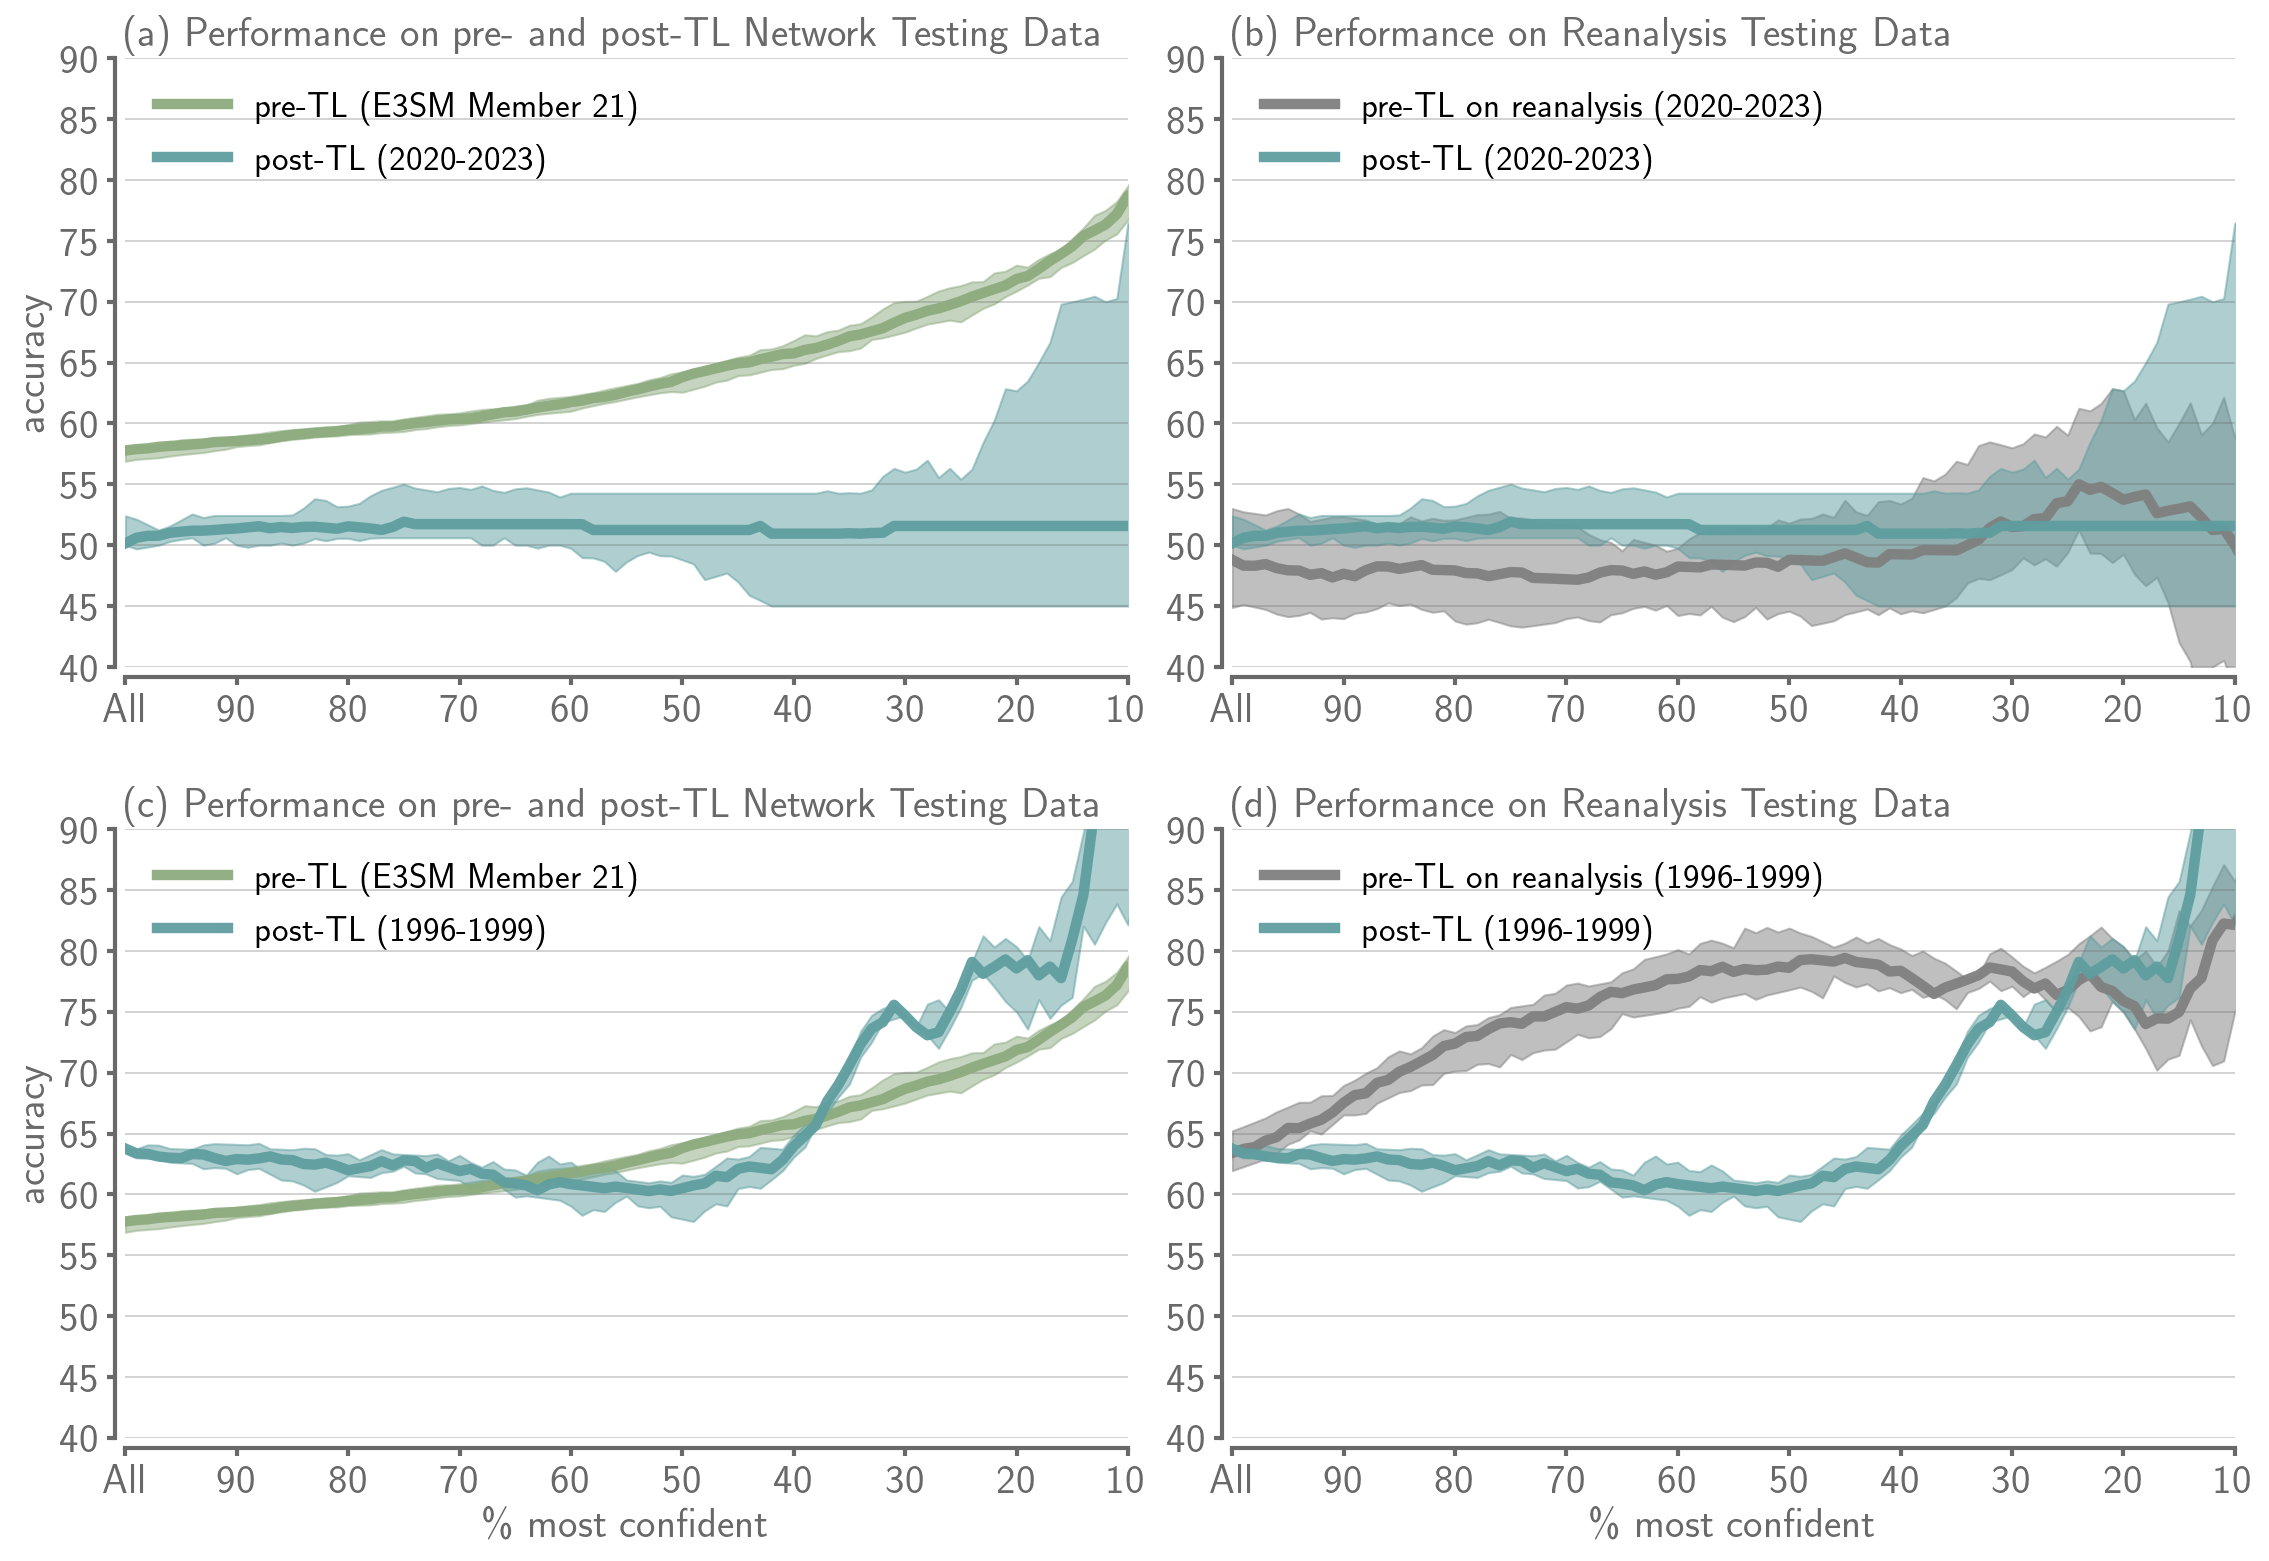

In [50]:
# -- PLOT
cesmcolor = 'k'
allobscolor = 'darkslateblue'
preTLcolor = (141/255,171/255,127/255,1.)
postTLcolor = 'cadetblue'
diffcolor = 'grey'
FS = 20

fig = plt.figure(figsize=(15,10))
ax = fig.subplot_mosaic('''
                        AB
                        CD
                        ''')
plt.tight_layout(w_pad=1,h_pad=3.5)

for loc in ['A','B','C','D']:
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

    if loc in ['A','C']:
        ax[loc].set_ylabel('accuracy',fontsize=FS,color='dimgrey')
    if loc in ['C','D']:
        ax[loc].set_xlabel('\% most confident',fontsize=FS,color='dimgrey')
    
    ax[loc].set_ylim(40,90)
    ax[loc].set_yticks(np.arange(40,95,5),labels=np.arange(40,95,5),fontsize=FS,color='dimgrey')
    ax[loc].set_xlim(0,90)
    ax[loc].set_xticks(np.arange(0,100,10),['All',90,80,70,60,50,40,30,20,10],fontsize=FS,color='dimgrey')
    
# panel (a)
ax['A'].set_title('(a) Performance on pre- and post-TL Network Testing Data',fontsize=FS,color='dimgrey', loc='left')
ax['A'].fill_between(np.arange(0,100,1),ann1_acc_min,ann1_acc_max,color=preTLcolor, alpha=0.5)
ax['A'].fill_between(np.arange(0,100,1),ann2_acc_min,ann2_acc_max,color=postTLcolor, alpha=0.5)

ax['A'].plot(ann1_acc_avg, '-', color=preTLcolor, alpha=0.95,linewidth=5,label='pre-TL (E3SM Member 21)')
ax['A'].plot(ann2_acc_avg, '-', color=postTLcolor, alpha=0.95,linewidth=5,label='post-TL (2020-2023)')

ax['A'].legend(frameon=False, fontsize=FS-3, loc='upper left',ncol=1)

# panel (b)
ax['B'].set_title('(b) Performance on Reanalysis Testing Data',fontsize=FS,color='dimgrey', loc='left')
ax['B'].fill_between(np.arange(0,100,1),ann1_obs_acc_min,ann1_obs_acc_max,color='grey', alpha=0.5)
ax['B'].fill_between(np.arange(0,100,1),ann2_acc_min,ann2_acc_max,color=postTLcolor, alpha=0.5)

ax['B'].plot(ann1_obs_acc_avg, '-', color='grey', alpha=0.95,linewidth=5,label='pre-TL on reanalysis (2020-2023)')
ax['B'].plot(ann2_acc_avg, '-', color=postTLcolor, alpha=0.95,linewidth=5,label='post-TL (2020-2023)')

ax['B'].legend(frameon=False, fontsize=FS-3, loc='upper left',ncol=1)

####################

# panel (c)
ax['C'].set_title('(c) Performance on pre- and post-TL Network Testing Data',fontsize=FS,color='dimgrey', loc='left')
ax['C'].fill_between(np.arange(0,100,1),ann1_acc_ex2_min,ann1_acc_ex2_max,color=preTLcolor, alpha=0.5)
ax['C'].fill_between(np.arange(0,100,1),ann2_acc_ex2_min,ann2_acc_ex2_max,color=postTLcolor, alpha=0.5)

ax['C'].plot(ann1_acc_ex2_avg, '-', color=preTLcolor, alpha=0.95,linewidth=5,label='pre-TL (E3SM Member 21)')
ax['C'].plot(ann2_acc_ex2_avg, '-', color=postTLcolor, alpha=0.95,linewidth=5,label='post-TL (1996-1999)')

ax['C'].legend(frameon=False, fontsize=FS-3, loc='upper left',ncol=1)

# panel (d)
ax['D'].set_title('(d) Performance on Reanalysis Testing Data',fontsize=FS,color='dimgrey', loc='left')
ax['D'].fill_between(np.arange(0,100,1),ann1_obs_acc_ex2_min,ann1_obs_acc_ex2_max,color='grey', alpha=0.5)
ax['D'].fill_between(np.arange(0,100,1),ann2_acc_ex2_min,ann2_acc_ex2_max,color=postTLcolor, alpha=0.5)

ax['D'].plot(ann1_obs_acc_ex2_avg, '-', color='grey', alpha=0.95,linewidth=5,label='pre-TL on reanalysis (1996-1999)')
ax['D'].plot(ann2_acc_ex2_avg, '-', color=postTLcolor, alpha=0.95,linewidth=5,label='post-TL (1996-1999)')

ax['D'].legend(frameon=False, fontsize=FS-3, loc='upper left',ncol=1)


# panel (e)
# ax['E'].set_title('(e) Performance on pre- and post-TL Network',fontsize=FS,color='dimgrey', loc='left')
# ax['E'].fill_between(np.arange(0,100,1),ann1_acc_min,ann1_acc_max,color=preTLcolor, alpha=0.5)
# ax['E'].fill_between(np.arange(0,100,1),ann1_allobs_acc_min,ann1_allobs_acc_max,color=allobscolor, alpha=0.5)

# ax['E'].plot(ann1_acc_avg, '-', color=preTLcolor, alpha=0.95,linewidth=5,label='pre-TL (E3SM Member 21)')
# ax['E'].plot(ann1_allobs_acc_avg, '-', color=allobscolor, alpha=0.95,linewidth=5,label='post-TL (1996-2023)')

# ax['E'].legend(frameon=False, fontsize=FS-3, loc='upper left',ncol=1)

# plt.show()
plt.savefig('plots/reanalysis_check.png', dpi=300, transparent = True, bbox_inches = 'tight')